# **Real-time Anomaly Detection for Secure Water Treatment (RTA-SWaT)**
* The project task is to visualize summaries of the data stream(s) and develop an ML model to detect anomalies in the data set.
* In this project work we will use SWaT.A3_Jun 2017 . It is 136 hours of network traffic , historian data from continuously running SWaT and the data collected for 6 days 

In [ ]:
import os, time, datetime, io, csv
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

## GDrive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load from GDrive
ROOT_PATH = '/content/drive/My Drive/Datasets'
RAR_PATH  = os.path.join(ROOT_PATH, 'SWaT.A3_2017 HistorianData-20201221T203431Z-001')
FILE_PATH = os.path.abspath(f"{ROOT_PATH}/SWaT_A3/All.xlsx")

!unrar x -Y "{RAR_PATH}.rar" "{ROOT_PATH}"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/Datasets/SWaT.A3_2017 HistorianData-20201221T203431Z-001.rar

Creating    /content/drive/My Drive/Datasets/SWaT.A3_2017 HistorianData-20201221T203431Z-001  OK
Creating    /content/drive/My Drive/Datasets/SWaT.A3_2017 HistorianData-20201221T203431Z-001/HistorianData  OK
Extracting  /content/drive/My Drive/Datasets/SWaT.A3_2017 HistorianData-20201221T203431Z-001/HistorianData/All.xlsx       0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 

In [ ]:
print(f"Moving the file to {ROOT_PATH}/SWaT_A3 ...")
try:
  !mkdir "{ROOT_PATH}/SWaT_A3"
  !mv "{RAR_PATH}/HistorianData/All.xlsx" "{ROOT_PATH}/SWaT_A3"
  !rm -rf "{RAR_PATH}"
except:
  print("x_x Something went wrong!")
finally:
  print("> Done")

Moving the file to /content/drive/My Drive/Datasets/SWaT_A3 ...
mkdir: cannot create directory ‘/content/drive/My Drive/Datasets/SWaT_A3’: File exists
> Done


## Load

In [ ]:
# Importing the datase
data = pd.read_excel(FILE_PATH, header = 1)
# Showing sample values from the dataset
data.head()

,Time,SWAT_SUTD:RSLinx Enterprise:P1.HMI_FIT101.Pv,SWAT_SUTD:RSLinx Enterprise:P1.HMI_LIT101.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT201.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT202.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_AIT203.Pv,SWAT_SUTD:RSLinx Enterprise:P2.HMI_FIT201.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_DPIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_FIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P3.HMI_LIT301.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_AIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_AIT402.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_FIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P4.HMI_LIT401.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_AIT504.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_FIT504.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT501.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT502.Pv,SWAT_SUTD:RSLinx Enterprise:P5.HMI_PIT503.Pv,SWAT_SUTD:RSLinx Enterprise:P6.HMI_FIT601.Pv,SWAT_SUTD:RSLinx Enterprise:P1.HMI_MV101.Status,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P101.Status,SWAT_SUTD:RSLinx Enterprise:P1.HMI_P102.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_MV201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P201.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P202.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P203.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P204.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P205.Status,SWAT_SUTD:RSLinx Enterprise:P2.HMI_P206.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV301.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV302.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV303.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_MV304.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P301.Status,SWAT_SUTD:RSLinx Enterprise:P3.HMI_P302.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P401.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P402.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P403.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_P404.Status,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P501.Status,SWAT_SUTD:RSLinx Enterprise:P5.HMI_P502.Status,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P601.Status,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P602.Status,SWAT_SUTD:RSLinx Enterprise:P6.HMI_P603.Status,SWAT_SUTD:RSLinx Enterprise:P4.HMI_UV401.Status
0,13/6/2017 4:23:00.000 PM,0.0,578.62,1017.01,6.96,386.75,0.0,2.85,0.00,1007.95,0,65.16,0.00,482.11,7.12,112.69,239.20,33.30,0.00,0.00,0.00,0.0,9.61,0.00,7.98,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,13/6/2017 4:23:37.961 PM,0.0,578.55,1017.01,6.96,386.51,0.0,1.57,0.00,1008.24,0,65.27,0.00,482.24,7.12,112.54,239.20,33.30,0.00,0.00,0.00,0.0,9.61,0.00,7.98,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
2,13/6/2017 4:24:15.922 PM,0.0,577.87,1017.01,6.96,386.77,0.0,9.87,2.07,997.83,0,62.75,1.06,476.48,7.12,110.19,237.86,351.16,1.06,0.80,0.23,0.0,9.61,0.00,136.30,0.0,1,1,1,1,1,1,1,1,1,1,1,0,1,2,2,1,2,1,1,1,1,1,1,1,1,2
3,13/6/2017 4:24:53.883 PM,0.0,578.65,1017.01,6.95,386.77,0.0,17.94,2.05,983.35,0,61.68,1.06,474.75,7.12,109.07,238.66,186.03,1.05,0.76,0.23,0.0,9.61,0.00,136.47,0.0,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,1,1,2
4,13/6/2017 4:25:31.844 PM,0.0,578.98,1017.01,6.96,386.64,0.0,17.80,2.06,967.78,0,60.50,1.24,480.84,7.12,107.33,237.86,81.21,1.25,0.97,0.26,0.0,9.61,1.17,160.35,0.0,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,1,2,1,1,1,1,2


# EDA and Data Preprocessing

## Re-write col names

In [ ]:

cols

['Time',
 'HMI_FIT101',
 'HMI_LIT101',
 'HMI_AIT201',
 'HMI_AIT202',
 'HMI_AIT203',
 'HMI_FIT201',
 'HMI_DPIT301',
 'HMI_FIT301',
 'HMI_LIT301',
 'HMI_AIT401',
 'HMI_AIT402',
 'HMI_FIT401',
 'HMI_LIT401',
 'HMI_AIT501',
 'HMI_AIT502',
 'HMI_AIT503',
 'HMI_AIT504',
 'HMI_FIT501',
 'HMI_FIT502',
 'HMI_FIT503',
 'HMI_FIT504',
 'HMI_PIT501',
 'HMI_PIT502',
 'HMI_PIT503',
 'HMI_FIT601',
 'HMI_MV101',
 'HMI_P101',
 'HMI_P102',
 'HMI_MV201',
 'HMI_P201',
 'HMI_P202',
 'HMI_P203',
 'HMI_P204',
 'HMI_P205',
 'HMI_P206',
 'HMI_MV301',
 'HMI_MV302',
 'HMI_MV303',
 'HMI_MV304',
 'HMI_P301',
 'HMI_P302',
 'HMI_P401',
 'HMI_P402',
 'HMI_P403',
 'HMI_P404',
 'HMI_P501',
 'HMI_P502',
 'HMI_P601',
 'HMI_P602',
 'HMI_P603',
 'HMI_UV401']

## Data properties

In [ ]:
# Data shape
data.shape

(13661, 52)

In [ ]:
# Data types
data.dtypes

Time            object
HMI_FIT101     float64
HMI_LIT101     float64
HMI_AIT201     float64
HMI_AIT202     float64
HMI_AIT203     float64
HMI_FIT201     float64
HMI_DPIT301    float64
HMI_FIT301     float64
HMI_LIT301     float64
HMI_AIT401       int64
HMI_AIT402     float64
HMI_FIT401     float64
HMI_LIT401     float64
HMI_AIT501     float64
HMI_AIT502     float64
HMI_AIT503     float64
HMI_AIT504     float64
HMI_FIT501     float64
HMI_FIT502     float64
HMI_FIT503     float64
HMI_FIT504     float64
HMI_PIT501     float64
HMI_PIT502     float64
HMI_PIT503     float64
HMI_FIT601     float64
HMI_MV101        int64
HMI_P101         int64
HMI_P102         int64
HMI_MV201        int64
HMI_P201         int64
HMI_P202         int64
HMI_P203         int64
HMI_P204         int64
HMI_P205         int64
HMI_P206         int64
HMI_MV301        int64
HMI_MV302        int64
HMI_MV303        int64
HMI_MV304        int64
HMI_P301         int64
HMI_P302         int64
HMI_P401         int64
HMI_P402   

In [ ]:
# Msssing values 
# data.isnull().sum().sort_values(ascending=False) columns wise
data.isnull().sum().sum()

0

In [ ]:
# Duplicated rows
data.duplicated().sum()

0

## Data statistics

In [ ]:
# Describe data
data.describe()

,HMI_FIT101,HMI_LIT101,HMI_AIT201,HMI_AIT202,HMI_AIT203,HMI_FIT201,HMI_DPIT301,HMI_FIT301,HMI_LIT301,HMI_AIT401,HMI_AIT402,HMI_FIT401,HMI_LIT401,HMI_AIT501,HMI_AIT502,HMI_AIT503,HMI_AIT504,HMI_FIT501,HMI_FIT502,HMI_FIT503,HMI_FIT504,HMI_PIT501,HMI_PIT502,HMI_PIT503,HMI_FIT601,HMI_MV101,HMI_P101,HMI_P102,HMI_MV201,HMI_P201,HMI_P202,HMI_P203,HMI_P204,HMI_P205,HMI_P206,HMI_MV301,HMI_MV302,HMI_MV303,HMI_MV304,HMI_P301,HMI_P302,HMI_P401,HMI_P402,HMI_P403,HMI_P404,HMI_P501,HMI_P502,HMI_P601,HMI_P602,HMI_P603,HMI_UV401
count,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.0,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.0,13661.000000,13661.000000,13661.0,13661.000000,13661.0,13661.000000,13661.0,13661.000000,13661.000000,13661.000000,13661.000000,13661.000000,13661.0,13661.000000,13661.0,13661.0,13661.0,13661.000000,13661.0,13661.0,13661.000000,13661.0,13661.000000
mean,1.556448,691.446398,250.063051,7.756857,344.859821,1.544751,14.043350,1.554724,828.256294,0.0,172.067969,1.500606,819.572698,7.237584,201.971271,256.755301,37.548311,1.509772,1.231769,0.554659,0.287426,237.809430,1.381536,168.208543,0.017058,1.330576,1.649586,1.0,1.745553,1.375448,1.0,1.540151,1.0,1.646219,1.0,1.019252,1.806310,1.039236,1.029134,1.755289,1.0,1.911500,1.0,1.0,1.0,1.910987,1.0,1.0,1.011053,1.0,1.911500
std,2.129987,109.415001,258.247646,0.805545,54.279119,1.131187,6.947472,0.864677,209.862795,0.0,53.737832,0.467938,208.108664,0.277212,43.620451,8.983450,5.174126,0.470790,0.384495,0.173120,0.090076,74.074233,0.715891,50.023382,0.161546,0.491145,0.477117,0.0,0.447012,0.484256,0.0,0.498404,0.0,0.478160,0.0,0.168086,0.413489,0.226529,0.212770,0.429932,0.0,0.284031,0.0,0.0,0.0,0.284772,0.0,0.0,0.104556,0.0,0.284031
min,0.000000,490.730000,137.100000,6.150000,242.350000,0.000000,0.010000,0.000000,242.850000,0.0,52.010000,0.000000,243.290000,6.730000,98.870000,236.410000,21.340000,0.000000,0.000000,0.000000,0.000000,9.610000,0.000000,7.260000,0.000000,0.000000,1.000000,1.0,0.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,1.000000
25%,0.000000,590.150000,154.960000,7.100000,281.310000,0.000000,9.530000,2.030000,817.780000,0.0,121.740000,1.640000,814.670000,7.060000,172.700000,251.510000,35.410000,1.650000,1.330000,0.610000,0.310000,260.190000,0.950000,182.260000,0.000000,1.000000,1.000000,1.0,2.000000,1.000000,1.0,1.000000,1.0,1.000000,1.0,1.000000,2.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.0,1.0,1.0,2.000000,1.0,1.0,1.000000,1.0,2.000000
50%,0.000000,704.170000,165.220000,7.430000,369.670000,2.370000,17.940000,2.040000,875.780000,0.0,179.950000,1.650000,884.540000,7.160000,202.280000,257.210000,37.490000,1.660000,1.350000,0.610000,0.320000,261.790000,1.200000,183.720000,0.000000,1.000000,2.000000,1.0,2.000000,1.000000,1.0,2.000000,1.0,2.000000,1.0,1.000000,2.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.0,1.0,1.0,2.000000,1.0,1.0,1.000000,1.0,2.000000
75%,4.490000,814.460000,174.510000,8.780000,387.590000,2.380000,18.290000,2.050000,954.830000,0.0,216.250000,1.650000,944.750000,7.450000,236.450000,262.660000,39.610000,1.660000,1.360000,0.610000,0.320000,263.220000,2.070000,185.000000,0.000000,2.000000,2.000000,1.0,2.000000,2.000000,1.0,2.000000,1.0,2.000000,1.0,1.000000,2.000000,1.000000,1.000000,2.000000,1.0,2.000000,1.0,1.0,1.0,2.000000,1.0,1.0,1.000000,1.0,2.000000
max,4.670000,824.760000,1017.340000,9.000000,456.800000,2.440000,19.060000,2.150000,1013.160000,0.0,251.950000,1.670000,1002.930000,7.850000,273.880000,312.780000,351.160000,1.680000,1.420000,0.630000,0.330000,266.530000,4.820000,195.540000,1.800000,2.000000,2.000000,1.0,2.000000,2.000000,1.0,2.000000,1.0,2.000000,1.0,2.000000,2.000000,2

## Preprocess: string to datetime

In [ ]:
# Values to datetime
data['Time'] = [datetime.datetime.strptime(t, "%d/%m/%Y %H:%M:%S.%f %p") for t in data['Time']] 

## Display distribution by day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


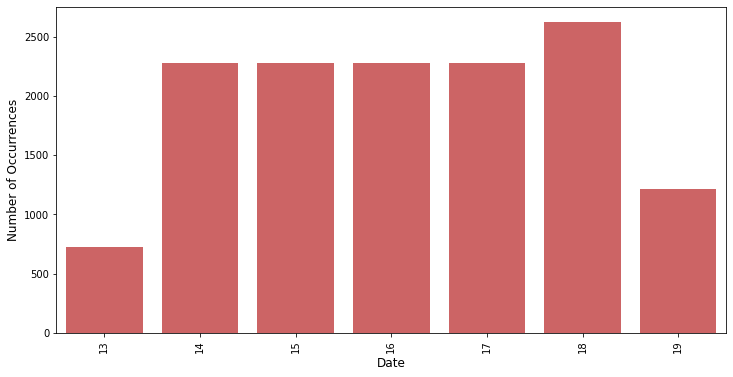

In [ ]:
# Distribution by days
day = data['Time'].dt.day

cnt_srs = day.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=sns.color_palette()[3])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

## Display distribution by hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


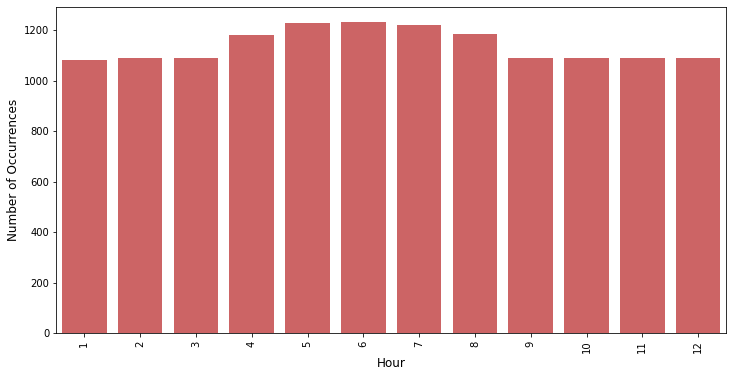

In [ ]:
# Distribution by hours

hours = data['Time'].dt.hour

cnt_srs = hours.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=sns.color_palette()[3])
plt.xticks(rotation='vertical')
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

## **Preprocess**: Remove unique cols

In [ ]:
# Find columns with only one values. We will drop them since they don't have any effect.
for col in train.columns:
  if len(train[col].value_counts()) == 1:
    print(f"> Dropping {col}")
    train = train.drop(col, axis=1)

## **[DONT RUN] Preprocess**: One hot encode categorical data

In [ ]:
# Get categorical columns
CATEG_RANGE = 3
cat, cont = [], []

for col in data.columns:
  if len(data[col].value_counts()) <= CATEG_RANGE:
    cat.append(col)
  else:
    cont.append(col)

In [ ]:
# One hot categorical data
def oneHot(data):
  continuous = data[cont]
  categorical = data[cat]
  encoded = pd.get_dummies(categorical, columns = categorical.columns)
  for col in encoded:
    continuous[col] = encoded[col]
  return continuous

encoded = oneHot(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


## **Notes**

* *The high dimensionality and non-stationary characteristics of the target dataset increase the complexity of detecting anomalies.*
* *Therefore, we mitigate high dimensionality and non-stationary characteristics by reducing the dimension using **autoencoder**.*

In particular, auto-encoder is a more effective nonlinear technology than PCA when reducing thedimensionality of high-dimensional data. Sakurada et
al. [30] found that auto-encoder can detect subtle anomalies that linear PCA fails and increase its accuracy by denoising. Therefore, we reduce 
dimensionality through auto-encoding and then performed training. 
Ref: https://jit.ndhu.edu.tw/article/download/2553/2571

*Since raw data has data-specific characteristics and distribution for each feature, performance will deteriorate if you use the data as it is. We use the
**MinMax scaler** to scale the features of the data to the same extent. The use of high dimensional data can cause the performance problem because of the curse of
dimensionality. To solve this problem, we apply the **auto-encoder** to reduce the dimensionality while preserving the unique properties of the data. To determine the latent vector’s optimal size in the autoencoder, it calculates the mean square error (MSE) loss value according to the latent vector’s size. The latent vector size with minimal MSE loss is determined as the optimal latent vector.*

## **Preprocess**: Standardize/Normalize data

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def Standardize(data, showBoxPlot=False):
  sc = StandardScaler()
  data_norm = pd.DataFrame( sc.fit_transform(data.iloc[:, data.columns != 'Time']) )
  data_norm_c = data_norm.copy()
  data_norm.columns = data.iloc[:, data.columns != 'Time'].columns
  data_norm.insert(0, 'Time', data['Time'])
  if showBoxPlot:
    fig = plt.subplots(figsize=(25,  30))
    data_norm_c.boxplot(widths = 0.4, notch=True)
  return data_norm

def Normalize(data, showBoxPlot=False):
  sc = MinMaxScaler()
  data_norm = pd.DataFrame( sc.fit_transform(data.iloc[:, data.columns != 'Time']) )
  data_norm_c = data_norm.copy()
  data_norm.columns = data.iloc[:, data.columns != 'Time'].columns
  data_norm.insert(0, 'Time', data['Time'])
  if showBoxPlot:
    fig = plt.subplots(figsize=(25,  30))
    data_norm_c.boxplot(widths = 0.4, notch=True)
  return data_norm

In [ ]:
# Zero center
data_scaled = Standardize(data) # Scaling the one hot encoded data isn't right
data_norm = Normalize(data) # We normalize the whole set
# Save a copy
# data_norm.to_csv(f"{ROOT_PATH}/SWaT_A3/SWaT_norm.csv", sep = ',', encoding = 'utf-8', index = False)
# print(f"> Zero centered data saved in {ROOT_PATH}/SWaT_A3/SWaT_norm.csv")

## **Preprocess**: Feature Extraction (PCA)

In [ ]:
from sklearn.decomposition import PCA

data_ = data_scaled
pca = PCA(n_components = 0.95)
pca.fit(data_.iloc[:, data_.columns != 'Time'])
reduced = pca.transform(data_.iloc[:, data_.columns != 'Time'])
principal_components = pd.DataFrame(data = reduced, columns=[f"P{col + 1}" for col in range(reduced.shape[1])])
principal_components

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14
0,11.239323,-0.015946,0.019378,-1.177505,-1.262729,0.922708,-0.061910,0.660440,-0.079713,-1.752990,0.229442,2.389817,-0.284886,-0.494532
1,11.250785,-0.028606,-0.484913,-1.264875,-0.429987,0.967385,-1.001235,4.449296,-1.148676,-1.297496,-1.480187,2.006869,0.072566,-0.151499
2,8.773312,-1.304100,-2.975731,15.844832,-1.014392,9.681100,6.901244,-3.125790,27.095738,46.955617,-4.045413,12.653101,4.766548,-0.784740
3,7.140906,-0.706576,-4.087434,7.171380,1.410655,5.293826,2.058185,-0.095913,11.753912,22.351361,-2.424112,7.005019,2.397368,0.369435
4,4.788603,-1.268151,-2.704121,2.395107,1.352515,2.798837,0.755153,-0.633777,2.202329,6.586427,-0.850385,3.342348,-0.497214,0.446388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13656,6.700938,4.547329,-1.809050,-3.812576,0.739007,-1.305559,-0.850753,0.117150,2.981989,0.959137,0.349857,1.009364,0.484703,-0.829143
13657,6.637403,4.546697,-1.790657,-3.816037,0.699654,-1.445606,-0.926172,0.149470,3.066294,0.919508,0.349737,1.083454,0.457412,-0.813635
13658,6.582334,4.555572,-1.776734,-3.817629,0.658955,-1.591026,-1.009351,0.185840,3.169918,0.880565,0.347239,1.159485,0.401438,-0.792857
13659,6.523834,4.569352,-1.763998,-3.813433,0.626434,-1.684105,-1.064963,0.220620,3.250322,0.838122,0.343053,1.248096,0.356967,-0.772737


## **[DONT RUN] Preprocess**: Feature Extraction (AutoEncoder)

In [ ]:
# We extract features of the whole set
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout

class AutoEncoders(Model):

  def __init__(self, output_units):

    super().__init__()
    self.encoder = Sequential(
        [
          Dense(32, activation="relu"),
          Dense(16, activation="relu"),
          Dense(7, activation="relu")
        ]
    )

    self.decoder = Sequential(
        [
          Dense(16, activation="relu"),
          Dense(32, activation="relu"),
          Dense(output_units, activation="sigmoid")
        ]
    )

def call(self, inputs):

  encoded = self.encoder(inputs)
  decoded = self.decoder(encoded)
  return decoded
  
auto_encoder = AutoEncoders(len(data_norm.columns))

auto_encoder.compile(
    loss='mae',
    metrics=['mae'],
    optimizer='adam'
)

history = auto_encoder.fit(
    data_norm, 
    data_norm, 
    epochs=15, 
    batch_size=32, 
    validation_data=(data_norm, data_norm)
)

ValueError: ignored

In [ ]:
# Get extracted auto encoder features
encoder_layer = auto_encoder.get_layer('sequential')
reduced_df = pd.DataFrame(encoder_layer.predict(data_norm))
reduced_df = reduced_df.add_prefix('F')

## **[DONT RUN] Preprocess**: Data merge

In [ ]:
# Merge extracted features with scaled data

data_processed = principal_components
for col in encoded.columns:
  data_processed[col] = encoded[col]
data_processed.insert(0, 'Time', data_norm['Time'])

,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,HMI_MV101_0,HMI_MV101_1,HMI_MV101_2,HMI_P101_1,HMI_P101_2,HMI_MV201_0,HMI_MV201_1,HMI_MV201_2,HMI_P201_1,HMI_P201_2,HMI_P203_1,HMI_P203_2,HMI_P205_1,HMI_P205_2,HMI_MV301_0,HMI_MV301_1,HMI_MV301_2,HMI_MV302_0,HMI_MV302_1,HMI_MV302_2,HMI_MV303_0,HMI_MV303_1,HMI_MV303_2,HMI_MV304_0,HMI_MV304_1,HMI_MV304_2,HMI_P301_1,HMI_P301_2,HMI_P401_1,HMI_P401_2,HMI_P501_1,HMI_P501_2,HMI_P602_1,HMI_P602_2,HMI_UV401_1,HMI_UV401_2
0,2017-06-13 04:23:00.000,9.386796,-1.033000,0.979879,-0.455748,0.965234,-1.039768,-0.891766,-1.032946,-1.363243,0.896180,1.884953,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0
1,2017-06-13 04:23:37.961,9.420973,-1.042186,0.930978,-0.393594,1.027893,-1.025857,-0.933354,-1.084686,-1.350287,0.894811,1.874277,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0
2,2017-06-13 04:24:15.922,8.979472,16.283727,9.997017,5.320341,-2.038042,51.136346,10.867623,3.310531,14.703730,10.837839,5.673529,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1
3,2017-06-13 04:24:53.883,7.195370,7.579652,6.100799,2.021809,-1.577801,23.695636,5.434829,1.912542,6.854509,5.775119,3.859446,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1
4,2017-06-13 04:25:31.844,5.375259,2.571830,3.453027,0.680791,-1.109805,6.082446,1.757742,0.771272,2.582760,1.389896,2.914838,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13656,2017-06-19 08:37:51.876,5.753843,-3.370887,1.305389,-3.460631,0.112723,2.442851,1.439835,-0.373244,-1.874536,0.556668,0.207780,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
13657,2017-06-19 08:38:17.632,5.678489,-3.370541,1.189227,-3.595218,0.156661,2.469904,1.443566,-0.424041,-1.900526,0.570462,0.277562,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
13658,2017-06-19 08:38:43.388,5.613341,-3.367951,1.076714,-3.750402,0.208172,2.510761,1.452060,-0.483075,-1.936151,0.558578,0.356747,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0
13659,2017-06-19 08:39:09.144,5.544871,-3.361610,1.013241,-3.865485,0.264902,2.537284,1.455294,-0.548593,-1.966244,0.564128,0.433232,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0


## Install modules

In [ ]:
!pip install kafka-python

     |████████████████████████████████| 246 kB 4.9 MB/s 


## Split the data

In [ ]:
data_processed = principal_components

i = round(len(data_processed)*.9)
train = data_processed[0:i] # 90% of the data
test = data_processed[i+1:len(data_processed)] # 10% of the data
print(len(train), len(test))

12295 1365


In [ ]:
train.to_csv(f"{ROOT_PATH}/SWaT_A3/SWaT_train.csv", sep = ',', encoding = 'utf-8', index = False)
test.to_csv(f"{ROOT_PATH}/SWaT_A3/SWaT_test.csv", sep = ',', encoding = 'utf-8', index = False)

# Clustering model

## KMeans

In [ ]:
from sklearn.cluster import KMeans

def KMeansC( data, n_clusters ):
  kmeans = KMeans( n_clusters = n_clusters )
  kmeans.fit( data )
  return kmeans

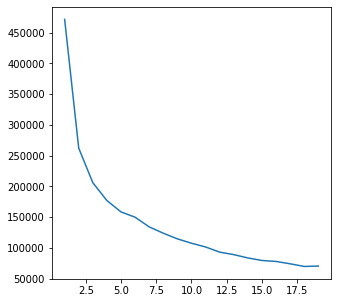

In [ ]:
error_rates = []

# Find out the right clusters number
for N in range(1, 20):
    kmeans = KMeansC(data = train, n_clusters = N)
    error_rates.append(kmeans.inertia_)

# Display elbow curve
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(list(range(1, 20)), error_rates)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculating the Silhouette Score for KMeans
NUM_CLUSTERS = 2
kmeans = KMeansC(data = train, n_clusters = NUM_CLUSTERS)
silhouette_score( train, kmeans.labels_) # apprx. .337 for N=3

0.6151395777538384

In [ ]:
test = test.reset_index(drop=True) # Start indexing from 0
preds = kmeans.predict(test) # Index starts from 0

X, Y = [], []
VISUALIZE_COL = 'P1'

print('> Anomalies')
for i in list(np.where(preds == 1)[0]):
  print(f'  >> Index: {i}')
  print(np.asarray(test.loc[i,:]))
  X.append(np.array(test[VISUALIZE_COL])[i])
  Y.append(i)

> Anomalies
  >> Index: 1359
[ 6.77194204  4.54684502 -1.82212681 -3.83004457  0.78347657 -1.1387734
 -0.75917633  0.08125415  2.87387773  0.99264751  0.35540808  0.93377606
  0.54918224 -0.85528204]
  >> Index: 1360
[ 6.70093777  4.54732883 -1.80904991 -3.81257583  0.73900724 -1.30555884
 -0.85075347  0.11715043  2.98198874  0.95913727  0.34985674  1.00936429
  0.48470326 -0.82914348]
  >> Index: 1361
[ 6.6374031   4.54669674 -1.79065675 -3.81603707  0.69965388 -1.44560622
 -0.92617163  0.14947034  3.06629404  0.91950787  0.34973683  1.0834536
  0.45741229 -0.81363468]
  >> Index: 1362
[ 6.58233439  4.55557223 -1.77673447 -3.81762947  0.65895499 -1.59102637
 -1.00935062  0.1858395   3.16991806  0.88056487  0.34723856  1.15948537
  0.40143831 -0.79285683]
  >> Index: 1363
[ 6.52383408  4.56935235 -1.76399776 -3.81343346  0.62643448 -1.68410452
 -1.0649629   0.2206195   3.25032212  0.83812176  0.34305298  1.24809598
  0.35696662 -0.77273689]
  >> Index: 1364
[ 6.4774362   4.57978466 -1.

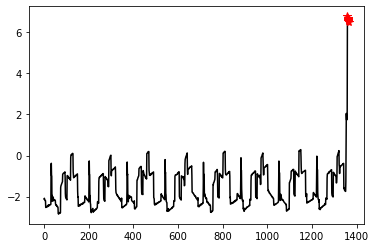

In [ ]:
plt.plot(test[VISUALIZE_COL], 'k-')
plt.plot(Y, X, 'r*', markersize=8)

## DB Scan

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def DBScan( data ):
  epsilons = [0.25, 0.5, 1, 1.5]
  min_samples = [10, 20, 30, 40]
  scores = []

  for (e, ms) in zip(epsilons, min_samples):
    dbscan = DBSCAN(min_samples = ms, eps = e)
    dbscan.fit( data )
    scores.append(silhouette_score( data, dbscan.labels_ ))

  return max(scores), epsilons[scores.index(max(scores))], min_samples[scores.index(max(scores))], dbscan.labels_

# Apply on dataset
max_score_db, eps_db, ms_db, labels_db = DBScan( train.loc[:, train.columns != 'Time'] )
print("|#| The best score was: %.3f"%max_score_db + " was achieved by eps: %.3f"%eps_db + " and min_samples: %d"%ms_db)

|#| The best score was: 0.236 was achieved by eps: 1.500 and min_samples: 40


In [ ]:
# Create an instance of the model with the tuned hyper parameters
dbscan = DBSCAN(min_samples = 40, eps = 1.5)
dbscan.fit( test )

DBSCAN(eps=1.5, min_samples=40)

In [ ]:
X_db, Y_db = [], []
VISUALIZE_COL = 'P6'

for i in np.where(dbscan.labels_ == -1)[0]:
  X_db.append(np.array(test[VISUALIZE_COL])[i])
  Y_db.append(test[VISUALIZE_COL].index[i])

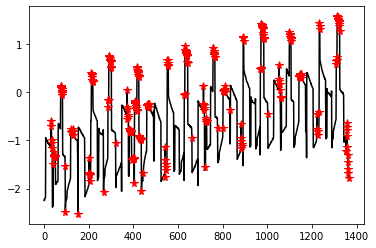

In [ ]:
plt.plot(test[VISUALIZE_COL], 'k-')
plt.plot(Y_db, X_db, 'r*', markersize=8)

## Isolation forest

In [ ]:
from sklearn.ensemble import IsolationForest
from joblib import dump

def IsolationForestC(data, n_estimators, max_samples, contamination):
  model = IsolationForest(
      n_estimators = n_estimators, 
      max_samples = max_samples, 
      contamination = contamination,
      random_state = np.random.RandomState(42)
  )
  model.fit(data)
  return model

clf = IsolationForestC(
    train, 
    n_estimators=50, 
    max_samples=500, 
    contamination=0.01
)

# Save model
dump(clf, './isolation_forest.joblib')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
scores = []
preds = []

for i, row in test.iterrows():
  pred = clf.predict(np.asarray(row).reshape(1, -1))
  preds.append(pred[0])
  if pred == -1:
    score = clf.score_samples(np.asarray(row).reshape(1, -1))
    scores.append(np.round(score, 3).tolist())

In [ ]:
X_iso, Y_iso = [], []
VISUALIZE_COL = 'P1'

for i in preds:
  if i == -1:
    X_iso.append(np.array(test[VISUALIZE_COL])[i])
    Y_iso.append(test[VISUALIZE_COL].index[i])

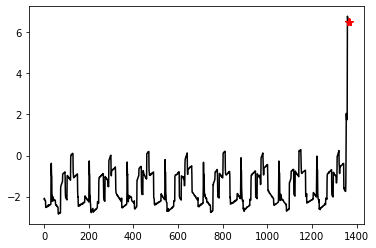

In [ ]:
plt.plot(test[VISUALIZE_COL], 'k-')
plt.plot(Y_iso, X_iso, 'r*', markersize=8)